In [1]:
from pyesgf.search import SearchConnection
from pyesgf.logon import LogonManager

import xarray as xr
import glob
import re

import warnings
warnings.filterwarnings("ignore", message = ".+encoding does not have units specified.+")
import os; os.environ ["ESGF_PYCLIENT_NO_FACETS_STAR_WARNING"] = ""

# create connection to ESGF servers

lm = LogonManager()
lm.logoff()
lm.logon(hostname="esg-dn1.nsc.liu.se", bootstrap=True, interactive=True)
lm.is_logged_on()

conn = SearchConnection('https://esgf-data.dkrz.de/esg-search')

Enter myproxy username: 

 ClairBarnes
Enter password for ClairBarnes:  ············


---
#### **HighResMIP**

In [13]:
hires_models = [{'source_id' : 'HadGEM3-GC31-MM', 'member_id' : 'r1i1p1f1'}]

In [17]:
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib = True)

for model_def in hires_models:
    
    ctx = conn.new_context(**model_def, variable = 'tasmax', frequency = 'day',
                           project = 'CMIP6', activity_id = 'HighResMIP', experiment_id = 'highresSST-future,highresSST-present', latest = True, facets = '*')
    
    urls = [[file.opendap_url for file in ctx_search.file_context().search(facets = None)] for ctx_search in ctx.search()]

HTTPError: 500 Server Error: 500 for url: https://esgf-data.dkrz.de/esg-search/search?format=application%2Fsolr%2Bjson&limit=50&distrib=true&offset=0&type=Dataset&latest=True&facets=%2A&source_id=HadGEM3-GC31-MM&member_id=r1i1p1f1&variable=tasmax&frequency=day&project=CMIP6&activity_id=HighResMIP&experiment_id=highresSST-future%2ChighresSST-present

In [ ]:
urls

In [21]:
urls[1] + urls[0]

['http://esgf3.dkrz.de/thredds/dodsC/cmip6/HighResMIP/CNRM-CERFACS/CNRM-CM6-1-HR/hist-1950/r1i1p1f2/day/pr/gr/v20190221/pr_day_CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_19500101-19541231.nc',
 'http://esgf3.dkrz.de/thredds/dodsC/cmip6/HighResMIP/CNRM-CERFACS/CNRM-CM6-1-HR/hist-1950/r1i1p1f2/day/pr/gr/v20190221/pr_day_CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_19550101-19591231.nc',
 'http://esgf3.dkrz.de/thredds/dodsC/cmip6/HighResMIP/CNRM-CERFACS/CNRM-CM6-1-HR/hist-1950/r1i1p1f2/day/pr/gr/v20190221/pr_day_CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_19600101-19641231.nc',
 'http://esgf3.dkrz.de/thredds/dodsC/cmip6/HighResMIP/CNRM-CERFACS/CNRM-CM6-1-HR/hist-1950/r1i1p1f2/day/pr/gr/v20190221/pr_day_CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_19650101-19691231.nc',
 'http://esgf3.dkrz.de/thredds/dodsC/cmip6/HighResMIP/CNRM-CERFACS/CNRM-CM6-1-HR/hist-1950/r1i1p1f2/day/pr/gr/v20190221/pr_day_CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_19700101-19741231.nc',
 'http://esgf3.dkrz.de/thredds/dodsC/cmip6/HighResMIP/CNRM-CERFACS/CNR

IndexError: list index out of range

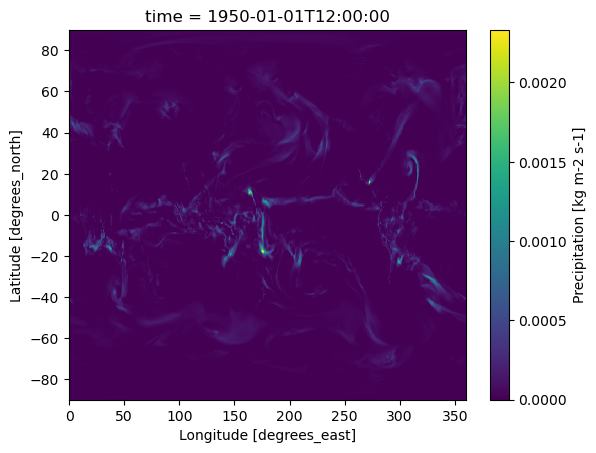

In [16]:
xr.open_mfdataset(zz[0]).isel(time = 0).pr.plot()

---
#### **CORDEX**

In [81]:
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True)

ctx = conn.new_context(facets = "domain, driving_model, rcm_name", project = 'CORDEX', domain = 'AFR-44, AFR-22', time_frequency = 'day', experiment = 'rcp85', variable = 'tas') 
print(ctx.hit_count)
ctx.facet_counts

42


{'domain': {'AFR-44': 31, 'AFR-22': 11},
 'driving_model': {'NOAA-GFDL-GFDL-ESM2M': 1,
  'NCC-NorESM1-M': 5,
  'MPI-M-MPI-ESM-MR': 2,
  'MPI-M-MPI-ESM-LR': 7,
  'MOHC-HadGEM2-ES': 8,
  'MIROC-MIROC5': 2,
  'IPSL-IPSL-CM5A-MR': 1,
  'IPSL-IPSL-CM5A-LR': 1,
  'ICHEC-EC-EARTH': 7,
  'CSIRO-QCCCE-CSIRO-Mk3-6-0': 1,
  'CNRM-CERFACS-CNRM-CM5': 2,
  'CCCma-CanESM2': 5},
 'rcm_name': {'RegCM4-7': 3,
  'RegCM4-3': 2,
  'REMO2015': 3,
  'REMO2009': 5,
  'RCA4': 14,
  'RACMO22T': 2,
  'HIRHAM5': 2,
  'CanRCM4': 4,
  'CCLM5-0-15': 3,
  'CCLM4-8-17': 4}}

In [ ]:
all_urls = [[file.opendap_url for file in ctx_search.file_context().search(facets = None)] for ctx_search in ctx.search()]


-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------

----------------------------------------------------

In [ ]:
all_urls